In [1]:
!pip install keras.applications

In [14]:
from tensorflow.keras.applications import ResNet50, ResNet101, ResNet152, VGG16, VGG19, InceptionV3
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
resnet50_model = ResNet50(weights='imagenet')
resnet101_model = ResNet101(weights='imagenet')
resnet152_model = ResNet152(weights='imagenet')
vgg16_model = VGG16(weights='imagenet')
vgg19_model = VGG19(weights='imagenet')
inceptionv3 = InceptionV3(weights='imagenet')

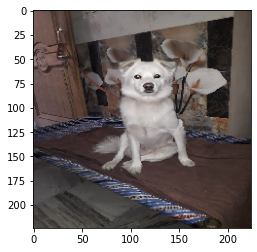

In [4]:
img_path = 'G:/image.jpeg'
from matplotlib import pyplot
img = image.load_img(img_path, target_size=(224, 224))
pyplot.imshow(img)

In [5]:
x = image.img_to_array(img)
x.shape

(224, 224, 3)

In [6]:
x = x.reshape((1,) + x.shape)
x.shape

(1, 224, 224, 3)

In [7]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
x = preprocess_input(x)
resnet50_model_pred = resnet50_model.predict(x)
p = decode_predictions(resnet50_model_pred, top=5)[0]

In [8]:
first_preidiction_name = []
first_preidiction_probobality = []
second_prediction_name = []
second_prediction_probobality = []

Eskimo_dog
Siberian_husky
Chihuahua
Great_Pyrenees
malamute


In [9]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
x = preprocess_input(x)
for i,d in zip([resnet50_model, resnet101_model, resnet152_model, vgg16_model, vgg19_model], ['resnet50_model', 'resnet101_model', 'resnet152_model', 'vgg16_model', 'vgg19_model']):
    pred = i.predict(x)
    p = decode_predictions(pred, top=2)[0]
    flag = 0
    for j in p:
        if flag==0:
            s = str(j[1]) + '(' + str(d) + ')'
            first_preidiction_name.append(s)
            first_preidiction_probobality.append(j[2]*100)
            flag += 1
        else:
            s = str(j[1]) + '(' + str(d) + ')'
            second_prediction_name.append(s)
            second_prediction_probobality.append(j[2]*100)
            

In [10]:
first_preidiction_name

['Eskimo_dog(resnet50_model)',
 'Eskimo_dog(resnet101_model)',
 'doormat(resnet152_model)',
 'Chihuahua(vgg16_model)',
 'Siberian_husky(vgg19_model)']

In [11]:
first_preidiction_probobality

[32.97299146652222,
 60.83328127861023,
 30.077525973320007,
 24.247483909130096,
 26.66690945625305]

In [12]:
second_prediction_name

['Siberian_husky(resnet50_model)',
 'Chihuahua(resnet101_model)',
 'Chihuahua(resnet152_model)',
 'Eskimo_dog(vgg16_model)',
 'Eskimo_dog(vgg19_model)']

In [13]:
second_prediction_probobality

[25.786757469177246,
 18.706999719142914,
 24.277953803539276,
 21.31035178899765,
 24.432431161403656]

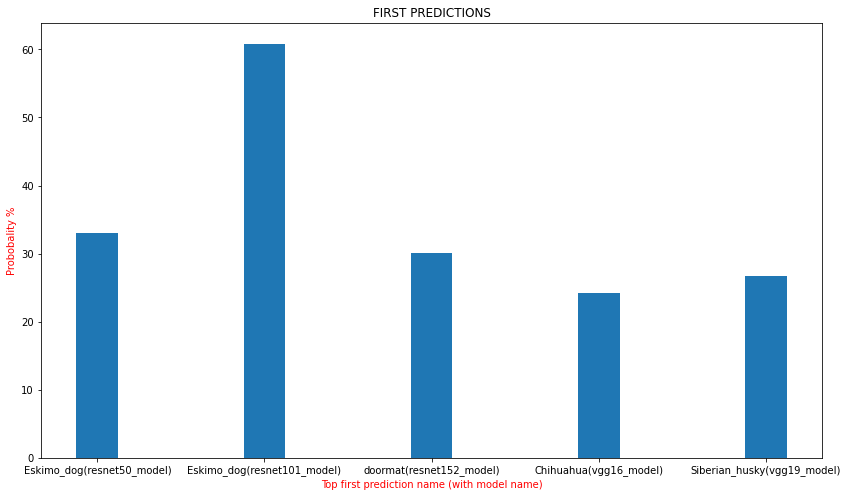

In [26]:
plt.figure(figsize=(14,8))
plt.title('FIRST PREDICTIONS')
plt.bar(first_preidiction_name, first_preidiction_probobality, width=0.25)
plt.xlabel('Top first prediction name (with model name)', color='red')
plt.ylabel('Probobality %', color='red')
plt.show()

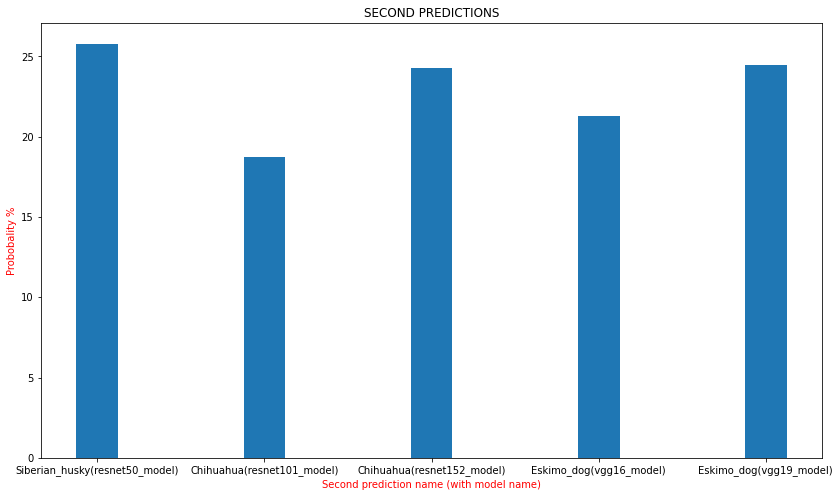

In [27]:
plt.figure(figsize=(14,8))
plt.bar(second_prediction_name, second_prediction_probobality, width=0.25)
plt.title('SECOND PREDICTIONS')
plt.xlabel('Second prediction name (with model name)', color='red')
plt.ylabel('Probobality %', color='red')
plt.show()